# **Random walk**

Write a Python script that simulates the random movement of a particle (e.g. a colloid in aqueous suspension). This is often called a random walk since for each time step the particle will randomly "walk" from its current location to a new location. In this challenge you will need to create a figure to visualize the path of the particle. 

Random walk is an important concept in physics and chemistry that describes [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). In this challenge you are required to simulate and track the path of a single particle, ignoring collisions with the boundaries (although this could be a nice addition).


## Rules
- Plot the particle path using cartesian coordinates

- The particle must start at the 0,0 position. This means x=0 and y=0 at the beginning of the iterative process.

- Use 8-connected pixels. This means that the particle can move to any of the 8 horizontally, vertically, and diagonally connected neighboring pixels (see figure below).

- The particle can remain in its current location. This makes a total of nine possible positions (8 neighboring pixels + staying in its current location)

- The particle moves only one unit (one square) per iteration

- The script must generate only a single plot at the end of the iterative process


## Hints
- Ignore time in your first attempt and focus on steps. If you are simulating a colloidal particle or gas molecule then a single iteration step could mean a millisecond, but if you are simulating the random walk of an animal then each iteration may represent an hour.

- If you decide to give it a try using a loop, make sure you don't generate a plot for thousands of iterations. If you want to plot the position of the particle at each step you may want to give it a try first with few steps. You could try to store the trail since the beginning into a `.GIF` image to animate the sequence of steps in time. 

- Here is a picture of an 8-connected system. Note the tiny arrow pointing to itself. This means that the particle can remain in the same position for one (or more) iterations. As you can imagine, the chances that a particle does not move out of the central pixel are nil over thousands of iterations (although statistically possible). Each arrow represents the possible location of the particle after an iteration.
<img src="../docs/_media/8-connected_neighbors.jpg" alt="8_connected_neighbors" width="200"/>

## Example
Below are some images of the same iterative process at different iteration steps. Your script should provide something similar to the last figure using 10,000 to 1 million iterations. Each figure will be different unless you set a specific seed of the random number generator.

<img src="../docs/_media/ten_thousand_iter.jpg" alt="example_results" width="500"/>


## Solution (using a loop)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


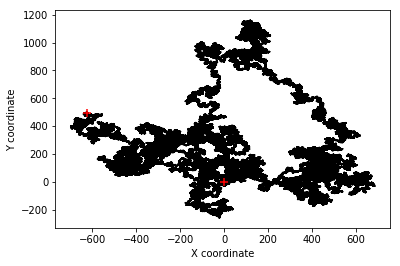

In [3]:
# Initial position
current_xpos = 0
current_ypos = 0

# Initial list of positions
x = [current_xpos]
y = [current_ypos]

# Define number of particle steps
N = 1000000

# Set seed for reproducible results (optional)
np.random.seed(10)

# Generate set of random steps in advance (it could also be done inside the for loop)
xstep = np.random.randint(-1,2,N)
ystep = np.random.randint(-1,2,N)

# Iterate and track the particle over each step
for i in range(N):
    
    # Update position
    current_xpos += xstep[i]
    current_ypos += ystep[i]
    
    # Append new position
    x.append(current_xpos)
    y.append(current_ypos)
    
# Generate plot of particle path
plt.figure()
plt.plot(x,y,'-k', zorder=1) # Particle path
plt.scatter(0, 0, s=50, marker='+', c='r', zorder=2) # Starting points
plt.scatter(current_xpos, current_ypos, s=50, marker='+', c='r', zorder=2) # Finishing point
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
#plt.savefig('example.tif')
plt.show()

## Alternative solution without loop

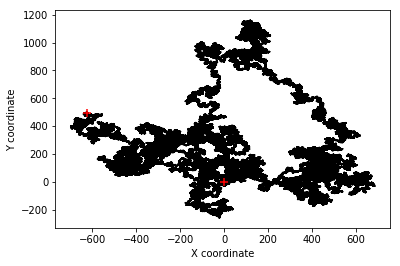

In [32]:
# Set random seed for reproducibility
np.random.seed(10)

# Number of particle steps
N = 1000000

# Generate set of random steps
xstep = np.random.randint(-1,2,N)
ystep = np.random.randint(-1,2,N)

# Cumulative sum (cumulative effect) of random choices
x = xstep.cumsum()
y = ystep.cumsum()

# For completeness add the initial position
# Omitting this step will not cause any noticeable difference in the plot
x = np.insert(xdata,0,0)
y = np.insert(ydata,0,0)
    
# Generate plot of particle path
plt.figure()
plt.plot(x,y,'-k', zorder=1) # Particle path
plt.scatter(0, 0, s=50, marker='+', c='r', zorder=2) # Starting points
plt.scatter(x[-1], y[-1], s=50, marker='+', c='r', zorder=3) # Finishing point
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

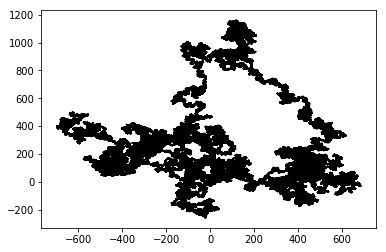

In [33]:
# Shortest version
np.random.seed(10)
N = 1000000
x = np.random.randint(-1,2,N).cumsum()
y = np.random.randint(-1,2,N).cumsum()
    
plt.figure()
plt.plot(x,y,'-k')
plt.show()